Shape: (30000, 25)

Dtypes summary:
int64    25
Name: count, dtype: int64

Columns: ['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6', 'default_payment_next_month']

Head:


,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default_payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0



Missing values (top 15):


,missing_count,missing_%
id,0,0.0
limit_bal,0,0.0
sex,0,0.0
education,0,0.0
marriage,0,0.0
age,0,0.0
pay_0,0,0.0
pay_2,0,0.0
pay_3,0,0.0
pay_4,0,0.0



Target counts:
default_payment_next_month
0    23364
1     6636
Name: count, dtype: int64

Target %:
default_payment_next_month
0    77.88
1    22.12
Name: proportion, dtype: float64


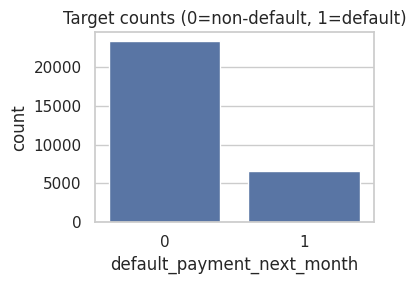

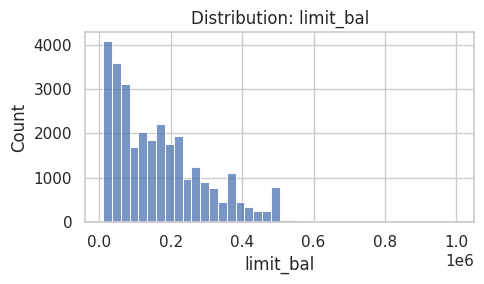

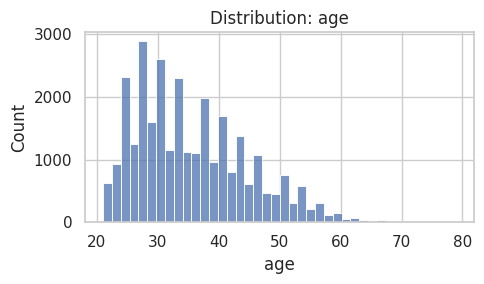

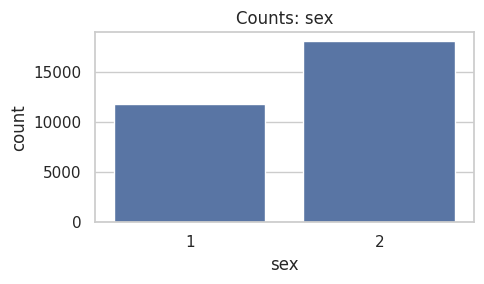

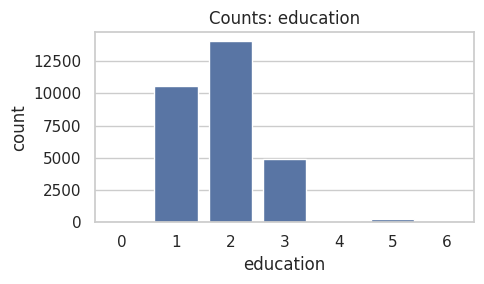

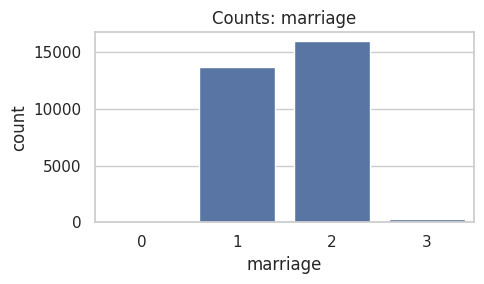

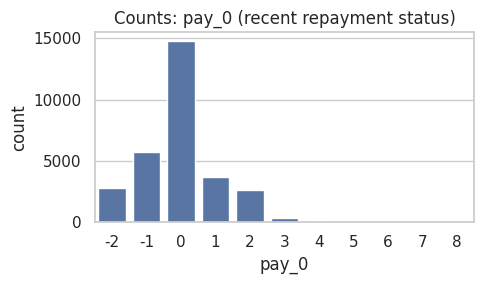

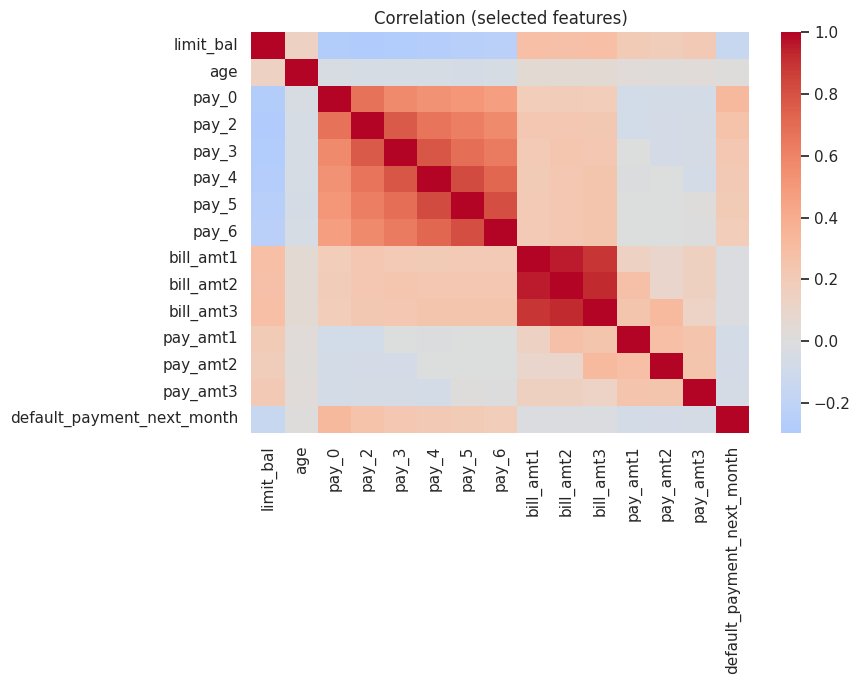


Default rate by education:


,education,default_rate_%
3,3,25.157616
2,2,23.734854
1,1,19.234766
6,6,15.686275
5,5,6.428571
4,4,5.691057
0,0,0.000000


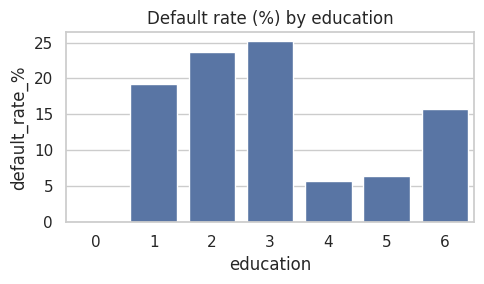


Default rate by marriage:


,marriage,default_rate_%
3,3,26.006192
1,1,23.471704
2,2,20.928339
0,0,9.259259


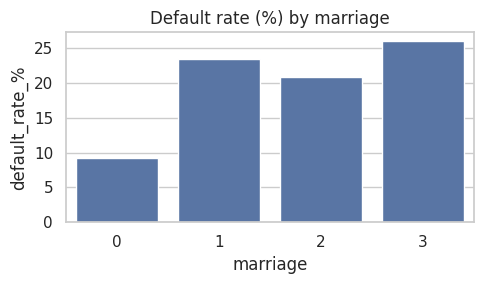


Light EDA complete. (No preprocessing applied.)


In [3]:
# ===========
# LIGHT EDA — UCI Credit Card Default
# ===========

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

# 1) Load with correct header row
df = pd.read_excel("default of credit card clients.xls", header=1)

# (Optional) tidy column names to snake_case for convenience
def tidy(name):
    return (
        str(name).strip()
        .replace(" ", "_").replace(".", "_").replace("-", "_")
        .lower()
    )
df.columns = [tidy(c) for c in df.columns]

TARGET = "default_payment_next_month"  # original: default.payment.next.month

# 2) Quick structure & peek
print("Shape:", df.shape)
print("\nDtypes summary:")
print(df.dtypes.value_counts())
print("\nColumns:", list(df.columns))

print("\nHead:")
display(df.head())

# 3) Missing values snapshot (top 15)
miss = df.isna().sum().sort_values(ascending=False)
miss_pct = (df.isna().mean()*100).sort_values(ascending=False)
mv = pd.DataFrame({"missing_count": miss, "missing_%": miss_pct})
print("\nMissing values (top 15):")
display(mv.head(15))

# 4) Target distribution
print("\nTarget counts:")
print(df[TARGET].value_counts())
print("\nTarget %:")
print((df[TARGET].value_counts(normalize=True)*100).round(2))

plt.figure(figsize=(4,3))
sns.countplot(x=TARGET, data=df)
plt.title("Target counts (0=non-default, 1=default)")
plt.tight_layout()
plt.show()

# 5) Key feature snapshots — minimal plots

# Numeric: limit_bal & age histograms
for col in ["limit_bal", "age"]:
    if col in df.columns:
        plt.figure(figsize=(5,3))
        sns.histplot(df[col], bins=40, kde=False)
        plt.title(f"Distribution: {col}")
        plt.tight_layout()
        plt.show()

# Categorical-like: sex, education, marriage
for col in ["sex", "education", "marriage"]:
    if col in df.columns:
        plt.figure(figsize=(5,3))
        order = sorted(df[col].dropna().unique())
        sns.countplot(x=col, data=df, order=order)
        plt.title(f"Counts: {col}")
        plt.tight_layout()
        plt.show()

# Recent repayment status only (PAY_0)
if "pay_0" in df.columns:
    plt.figure(figsize=(5,3))
    order = sorted(df["pay_0"].dropna().unique())
    sns.countplot(x="pay_0", data=df, order=order)
    plt.title("Counts: pay_0 (recent repayment status)")
    plt.tight_layout()
    plt.show()

# 6) Small correlation view (selected numerics + target)
sel = [c for c in [
    "limit_bal","age","pay_0","pay_2","pay_3","pay_4","pay_5","pay_6",
    "bill_amt1","bill_amt2","bill_amt3","pay_amt1","pay_amt2","pay_amt3",
    TARGET
] if c in df.columns]

if len(sel) > 2:
    plt.figure(figsize=(9,7))
    sns.heatmap(df[sel].corr(), cmap="coolwarm", center=0)
    plt.title("Correlation (selected features)")
    plt.tight_layout()
    plt.show()

# 7) Very quick target relationship snapshots (no heavy slicing)
# Default rate by education & marriage (simple group means)
for col in ["education", "marriage"]:
    if col in df.columns:
        tmp = df.groupby(col)[TARGET].mean().mul(100).reset_index(name="default_rate_%")
        print(f"\nDefault rate by {col}:")
        display(tmp.sort_values("default_rate_%", ascending=False))
        plt.figure(figsize=(5,3))
        sns.barplot(data=tmp, x=col, y="default_rate_%", order=sorted(df[col].dropna().unique()))
        plt.title(f"Default rate (%) by {col}")
        plt.tight_layout()
        plt.show()

print("\nLight EDA complete. (No preprocessing applied.)")
